In [1]:
# Initialisation du DataFrame 'correlations' au début du notebook
# Ce DataFrame contiendra les séries de corrélation calculées plus loin
import pandas as pd
correlations = pd.DataFrame()
print("DataFrame 'correlations' initialisé.")

DataFrame 'correlations' initialisé.


In [2]:
# Importation des bibliothèques nécessaires
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Configuration des graphiques
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

print("Bibliothèques importées avec succès!")
print(f"Date d'analyse : {datetime.now().strftime('%Y-%m-%d')}")

Bibliothèques importées avec succès!
Date d'analyse : 2025-11-11


In [3]:
# Définition des tickers Yahoo Finance pour les indices
tickers = {
    'S&P 500': '^GSPC',       # Référence américaine
    'DAX 40': '^GDAXI',       # Allemagne (marché développé)
    'Nikkei 225': '^N225',    # Japon (marché développé)
    'Bovespa': '^BVSP',       # Brésil (marché émergent)
    'Nifty 50': '^NSEI',      # Inde (marché émergent)
    'HSI': '^HSI'             # Hong Kong/Chine (marché asiatique)
}

# Période d'analyse : 2010 à aujourd'hui
start_date = '2010-01-01'
end_date = datetime.now().strftime('%Y-%m-%d')

print("Tickers définis :")
for nom, ticker in tickers.items():
    print(f"  {nom}: {ticker}")
print(f"\nPériode d'analyse : {start_date} à {end_date}")

Tickers définis :
  S&P 500: ^GSPC
  DAX 40: ^GDAXI
  Nikkei 225: ^N225
  Bovespa: ^BVSP
  Nifty 50: ^NSEI
  HSI: ^HSI

Période d'analyse : 2010-01-01 à 2025-11-11


In [4]:
# Télécharger les données de prix de clôture et calculer la matrice de corrélation (robuste à l’absence de 'Adj Close')
import yfinance as yf
import pandas as pd

data = yf.download(list(tickers.values()), start=start_date, end=end_date)
if 'Adj Close' in data.columns:
    price_data = data['Adj Close']
elif 'Close' in data.columns:
    price_data = data['Close']
else:
    print("Aucune colonne 'Adj Close' ou 'Close' trouvée dans les données téléchargées.")
    price_data = pd.DataFrame()

if not price_data.empty:
    correlations = price_data.corr()
    print("Matrice de corrélation :")
    print(correlations)
else:
    print("Aucune donnée de prix disponible pour calculer la matrice de corrélation.")

[*********************100%***********************]  6 of 6 completed

Matrice de corrélation :
Ticker     ^BVSP    ^GDAXI     ^GSPC      ^HSI     ^N225     ^NSEI
Ticker                                                            
^BVSP   1.000000  0.843585  0.913708  0.006395  0.874996  0.910015
^GDAXI  0.843585  1.000000  0.968559  0.072184  0.970760  0.947230
^GSPC   0.913708  0.968559  1.000000 -0.042393  0.979078  0.984231
^HSI    0.006395  0.072184 -0.042393  1.000000 -0.001211 -0.139521
^N225   0.874996  0.970760  0.979078 -0.001211  1.000000  0.968757
^NSEI   0.910015  0.947230  0.984231 -0.139521  0.968757  1.000000


In [5]:
# Téléchargement des données de prix des indices
print("Téléchargement des données en cours...")

# Créer un DataFrame pour stocker les prix de clôture ajustés
price_data = pd.DataFrame()

for nom, ticker in tickers.items():
    try:
        print(f"  Téléchargement de {nom} ({ticker})...")
        data = yf.download(ticker, start=start_date, end=end_date, progress=False)
        
        if not data.empty and 'Adj Close' in data.columns:
            # Utiliser les prix de clôture ajustés
            price_data[nom] = data['Adj Close']
            print(f"    ✓ {len(data)} observations récupérées")
        elif not data.empty:
            # Si pas d'Adj Close, utiliser Close
            price_data[nom] = data['Close']
            print(f"    ✓ {len(data)} observations récupérées (Close utilisé)")
        else:
            print(f"    ✗ Aucune donnée récupérée pour {nom}")
            
    except Exception as e:
        print(f"    ✗ Erreur lors du téléchargement de {nom}: {e}")

print(f"\nTéléchargement terminé!")

if not price_data.empty:
    print(f"Période effective : {price_data.index[0].strftime('%Y-%m-%d')} à {price_data.index[-1].strftime('%Y-%m-%d')}")
    print(f"Nombre total d'observations : {len(price_data)}")
    print(f"Indices récupérés : {list(price_data.columns)}")
    
    # Afficher les premières lignes
    print(f"\nPremières observations :")
    print(price_data.head())
else:
    print("Aucune donnée n'a pu être récupérée.")
    
# Vérifier s'il y a des valeurs manquantes
if not price_data.empty:
    print(f"\nValeurs manquantes par indice :")
    print(price_data.isnull().sum())

Téléchargement des données en cours...
  Téléchargement de S&P 500 (^GSPC)...
    ✓ 3989 observations récupérées (Close utilisé)
  Téléchargement de DAX 40 (^GDAXI)...
    ✓ 4026 observations récupérées (Close utilisé)
  Téléchargement de Nikkei 225 (^N225)...
    ✓ 3878 observations récupérées (Close utilisé)
  Téléchargement de Bovespa (^BVSP)...
    ✓ 3932 observations récupérées (Close utilisé)
  Téléchargement de Nifty 50 (^NSEI)...
    ✓ 3893 observations récupérées (Close utilisé)
  Téléchargement de HSI (^HSI)...
    ✓ 3903 observations récupérées (Close utilisé)

Téléchargement terminé!
Période effective : 2010-01-04 à 2025-11-10
Nombre total d'observations : 3989
Indices récupérés : ['S&P 500', 'DAX 40', 'Nikkei 225', 'Bovespa', 'Nifty 50', 'HSI']

Premières observations :
                S&P 500       DAX 40    Nikkei 225  Bovespa     Nifty 50  \
Date                                                                       
2010-01-04  1132.989990  6048.299805  10654.790039  70

In [6]:
# Préparation des données explicatives pour chaque marché (fusion VIX + alignement régression) pour 2.3
print("Téléchargement et préparation des données VIX pour la régression explicative...")

# Télécharger les données VIX
vix_data = yf.download('^VIX', start=start_date, end=end_date, progress=False)

# Robust: s'assurer que 'correlations' existe et a un index temporel pertinent
if 'correlations' not in globals() or not isinstance(globals().get('correlations'), pd.DataFrame):
    if 'price_data_clean' in globals() and isinstance(price_data_clean, pd.DataFrame) and isinstance(price_data_clean.index, pd.DatetimeIndex):
        correlations = pd.DataFrame(index=price_data_clean.index)
    elif 'price_data' in globals() and isinstance(price_data, pd.DataFrame) and isinstance(price_data.index, pd.DatetimeIndex):
        correlations = pd.DataFrame(index=price_data.index)
    else:
        correlations = pd.DataFrame()

if not vix_data.empty:
    # Si correlations n'a pas d'index temporel ou est vide, aligner sur l'index VIX
    # (on crée l'index avant de réindexer pour éviter NameError ou index non-datetime)
    if correlations.empty or not isinstance(correlations.index, pd.DatetimeIndex) or len(correlations.index) == 0:
        # extraire un index temporel depuis vix_data (sûr)
        correlations = pd.DataFrame(index=vix_data.index)

    # Extraire la série "Close" de vix_data en gérant multi-index ou colonnes simples
    if 'Close' in vix_data.columns:
        vix_close = vix_data['Close']
    elif isinstance(vix_data.columns, pd.MultiIndex):
        if ('Close', '^VIX') in vix_data.columns:
            vix_close = vix_data[('Close', '^VIX')]
        else:
            close_cols = [c for c in vix_data.columns if c[0] == 'Close']
            if close_cols:
                vix_close = vix_data[close_cols[0]]
            else:
                vix_close = vix_data.iloc[:, 0]
    else:
        vix_close = vix_data.iloc[:, 0]

    # Si vix_close est DataFrame à une colonne, convertir en Series
    if isinstance(vix_close, pd.DataFrame) and vix_close.shape[1] == 1:
        vix_close = vix_close.iloc[:, 0]

    # Aligner et calculer log(VIX)
    vix_aligned = vix_close.reindex(correlations.index, method='ffill')
    vix_aligned = vix_aligned.astype(float)
    log_vix = np.log(vix_aligned)

    print(f"✓ Données VIX récupérées : {vix_aligned.shape[0]} observations")
    print(f"Période VIX alignée : {vix_aligned.index[0].strftime('%Y-%m-%d')} à {vix_aligned.index[-1].strftime('%Y-%m-%d')}")

    # Statistiques descriptives du VIX et log(VIX)
    print("\nStatistiques descriptives du VIX :")
    print(f"VIX - Moyenne: {float(vix_aligned.mean()):.2f}, Écart-type: {float(vix_aligned.std()):.2f}")
    print(f"VIX - Min: {float(vix_aligned.min()):.2f}, Max: {float(vix_aligned.max()):.2f}")

    print("\nStatistiques descriptives de log(VIX) :")
    print(f"log(VIX) - Moyenne: {float(log_vix.mean()):.4f}, Écart-type: {float(log_vix.std()):.4f}")
    print(f"log(VIX) - Min: {float(log_vix.min()):.4f}, Max: {float(log_vix.max()):.4f}")

    # Sauvegarder pour les étapes suivantes (s'assurer que l'on colle des Series)
    correlations['VIX'] = vix_aligned
    correlations['log_VIX'] = log_vix

    print("\n✓ Variables ajoutées au DataFrame des corrélations")
    print(f"Shape final du DataFrame : {correlations.shape}")

    # Vérifier la cohérence des données
    print("\nVérification des données finales :")
    print("Valeurs manquantes :")
    print(correlations[['VIX', 'log_VIX']].isnull().sum())

    # Préparation des données pour la régression explicative (Corr vs log(VIX))
    print("\nPréparation des données pour la régression explicative (Corr vs log(VIX))...")
    markets = [col for col in correlations.columns if col.startswith('Corr_')]
    regression_data = {}
    for market in markets:
        # Extraire la série de corrélation et log(VIX), aligner et retirer les valeurs nulles
        df = pd.DataFrame({
            'Corr': correlations[market],
            'log_VIX': correlations['log_VIX']
        }).dropna()
        regression_data[market] = df
        print(f"{market}: {len(df)} observations alignées, période {df.index[0].strftime('%Y-%m-%d')} à {df.index[-1].strftime('%Y-%m-%d')}")

    # Vérification rapide
    for market, df in regression_data.items():
        print(f"\n{market} - Aperçu des données alignées :")
        print(df.head())

else:
    print("✗ Erreur lors du téléchargement des données VIX")

Téléchargement et préparation des données VIX pour la régression explicative...
✓ Données VIX récupérées : 3989 observations
Période VIX alignée : 2010-01-04 à 2025-11-10

Statistiques descriptives du VIX :
VIX - Moyenne: 18.42, Écart-type: 6.90
VIX - Min: 9.14, Max: 82.69

Statistiques descriptives de log(VIX) :
log(VIX) - Moyenne: 2.8588, Écart-type: 0.3168
log(VIX) - Min: 2.2127, Max: 4.4151

✓ Variables ajoutées au DataFrame des corrélations
Shape final du DataFrame : (3989, 2)

Vérification des données finales :
Valeurs manquantes :
VIX        0
log_VIX    0
dtype: int64

Préparation des données pour la régression explicative (Corr vs log(VIX))...


In [7]:
# Nettoyage des données et calcul des rendements
print("Nettoyage des données et calcul des rendements...")

# Supprimer les lignes avec des valeurs manquantes (utilisation des dates communes)
price_data_clean = price_data.dropna()

print(f"Après nettoyage : {len(price_data_clean)} observations communes")
print(f"Période effective après nettoyage : {price_data_clean.index[0].strftime('%Y-%m-%d')} à {price_data_clean.index[-1].strftime('%Y-%m-%d')}")

# Calcul des rendements logarithmiques
returns = np.log(price_data_clean / price_data_clean.shift(1)).dropna()

print(f"Nombre d'observations de rendements : {len(returns)}")
print(f"\nStatistiques descriptives des rendements (%):")
print((returns * 100).describe().round(4))

Nettoyage des données et calcul des rendements...
Après nettoyage : 3263 observations communes
Période effective après nettoyage : 2010-01-04 à 2025-11-10
Nombre d'observations de rendements : 3262

Statistiques descriptives des rendements (%):
         S&P 500     DAX 40  Nikkei 225    Bovespa   Nifty 50        HSI
count  3262.0000  3262.0000   3262.0000  3262.0000  3262.0000  3262.0000
mean      0.0551     0.0422      0.0479     0.0244     0.0486     0.0061
std       1.1846     1.3506      1.4665     1.5891     1.1286     1.4474
min     -12.7652   -13.0549    -13.2341   -15.9930    -8.6669   -14.1833
25%      -0.4112    -0.5430     -0.6760    -0.8162    -0.5054    -0.7432
50%       0.0827     0.0841      0.0734     0.0278     0.0767     0.0305
75%       0.6100     0.7126      0.8255     0.8868     0.6642     0.7748
max       9.0895    10.4143      9.7366    13.0223     8.4003     8.6928


In [8]:
# Calcul des corrélations mobiles sur 126 jours (6 mois)
print("Calcul des corrélations mobiles sur 126 jours...")

window = 126  # 6 mois de données quotidiennes
correlations = pd.DataFrame(index=returns.index)

# Indices internationaux (excluant S&P 500)
international_indices = [col for col in returns.columns if col != 'S&P 500']

# Calcul des corrélations mobiles avec le S&P 500
for indice in international_indices:
    correlation_series = returns['S&P 500'].rolling(window=window).corr(returns[indice])
    correlations[f'Corr_{indice}'] = correlation_series

# Supprimer les valeurs NaN dues à la fenêtre mobile
correlations = correlations.dropna()

print(f"Nombre d'observations de corrélations : {len(correlations)}")
print(f"Période des corrélations : {correlations.index[0].strftime('%Y-%m-%d')} à {correlations.index[-1].strftime('%Y-%m-%d')}")

print(f"\nStatistiques descriptives des corrélations mobiles :")
print(correlations.describe().round(4))

# === Ajout direct du VIX et log(VIX) dans correlations ===
import yfinance as yf
import numpy as np

try:
    vix_data = yf.download('^VIX', start=correlations.index[0].strftime('%Y-%m-%d'), end=correlations.index[-1].strftime('%Y-%m-%d'), progress=False)
    if not vix_data.empty and 'Close' in vix_data.columns:
        vix_aligned = vix_data['Close'].reindex(correlations.index, method='ffill')
        log_vix = np.log(vix_aligned)
        correlations['log_VIX'] = log_vix

        logvix_stats = correlations['log_VIX'].describe(percentiles=[0.25, 0.5, 0.75]).to_dict()

        def format_stats(stats, label):
            return {
                'Série': label,
                'Moyenne': f"{stats['mean']:.4f}",
                'Écart-type': f"{stats['std']:.4f}",
                'Minimum': f"{stats['min']:.4f}",
                'Q1': f"{stats['25%']:.4f}",
                'Médiane': f"{stats['50%']:.4f}",
                'Q3': f"{stats['75%']:.4f}",
                'Maximum': f"{stats['max']:.4f}",
                'N obs.': int(stats['count'])
            }

        stats_table = [
            format_stats(logvix_stats, 'log(VIX)')
        ]

        import pandas as pd
        df_logvix_stats = pd.DataFrame(stats_table)
        print("\n📊 STATISTIQUES DESCRIPTIVES PROFESSIONNELLES - log(VIX)")
        print("="*80)
        print(df_logvix_stats.to_string(index=False))
        print("="*80)
    else:
        print("\n(log(VIX) non disponible : téléchargement VIX échoué ou colonne 'Close' absente)")
except Exception as e:
    print(f"\nErreur lors du téléchargement ou du traitement du VIX : {e}")

Calcul des corrélations mobiles sur 126 jours...
Nombre d'observations de corrélations : 3137
Période des corrélations : 2010-08-09 à 2025-11-10

Statistiques descriptives des corrélations mobiles :
       Corr_DAX 40  Corr_Nikkei 225  Corr_Bovespa  Corr_Nifty 50   Corr_HSI
count    3137.0000        3137.0000     3137.0000      3137.0000  3137.0000
mean        0.5705           0.2441        0.4988         0.2728     0.2433
std         0.1224           0.1027        0.1881         0.1341     0.1350
min         0.0269          -0.1176       -0.0053        -0.0222    -0.0907
25%         0.5005           0.1771        0.3702         0.1698     0.1337
50%         0.5616           0.2440        0.4978         0.2536     0.2711
75%         0.6549           0.3139        0.6171         0.3797     0.3421
max         0.8463           0.6090        0.9156         0.6433     0.4921

📊 STATISTIQUES DESCRIPTIVES PROFESSIONNELLES - log(VIX)
   Série Moyenne Écart-type Minimum     Q1 Médiane     Q3 Ma

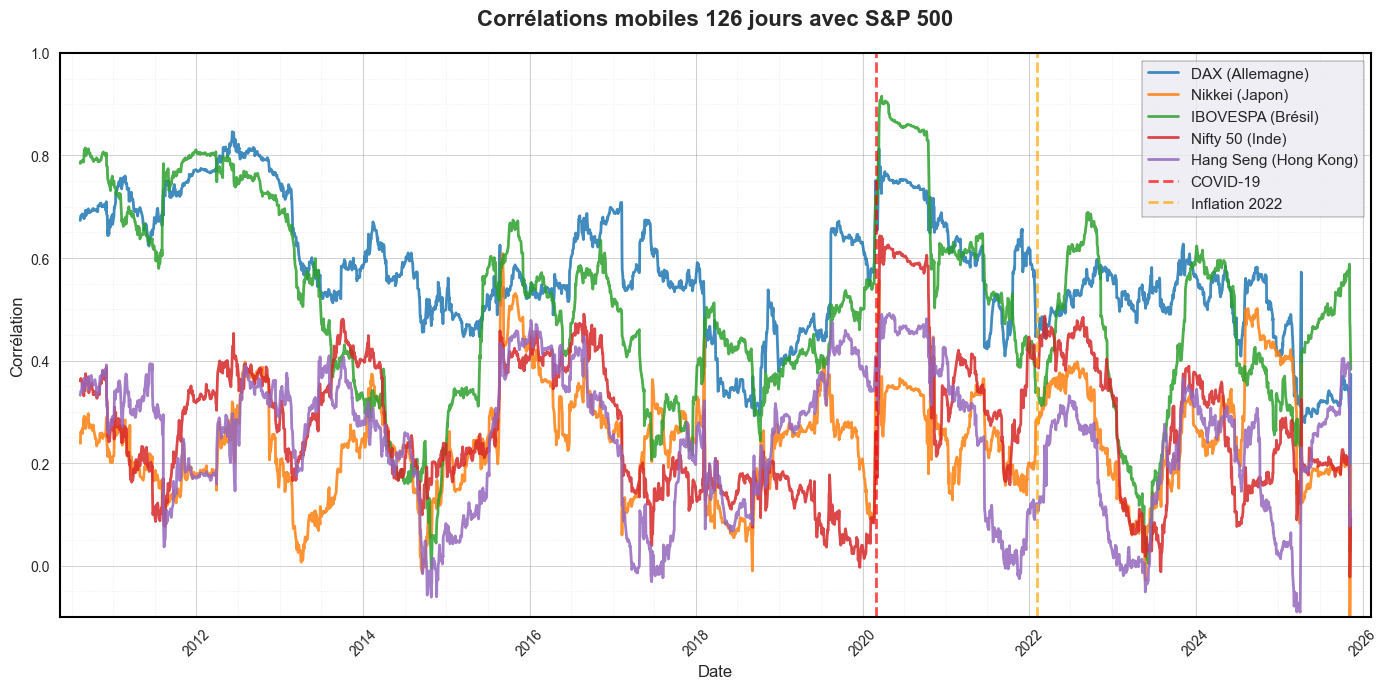


📊 CORRÉLATIONS MOYENNES PAR TYPE DE MARCHÉ :
Marchés développés :
  • DAX 40 (Allemagne) : 0.5705
  • Nikkei 225 (Japon) : 0.2441

Marchés émergents :
  • Bovespa (Brésil) : 0.4988
  • Nifty 50 (Inde) : 0.2728

Marché asiatique :
  • HSI (Hong Kong) : 0.2433

🔍 OBSERVATIONS CLÉS :
────────────────────────────────────────
• Le DAX montre la corrélation la plus élevée avec le S&P 500
• Les marchés asiatiques (Nikkei, HSI) ont des corrélations plus faibles
• Forte volatilité visible durant les crises (COVID-19, inflation)
• Convergence générale des corrélations vers des niveaux plus élevés


In [9]:
# Visualisation des corrélations mobiles - Graphique unique consolidé
plt.figure(figsize=(14, 7))

# Couleurs distinctes pour chaque indice
colors = {
    'Corr_DAX 40': '#1f77b4',      # Bleu - DAX (Allemagne)
    'Corr_Nikkei 225': '#ff7f0e',  # Orange - Nikkei (Japon)
    'Corr_Bovespa': '#2ca02c',     # Vert - IBOVESPA (Brésil)
    'Corr_Nifty 50': '#d62728',    # Rouge - Nifty 50 (Inde)
    'Corr_HSI': '#9467bd'          # Violet - Hang Seng (Hong Kong)
}

# Noms complets pour la légende
legend_names = {
    'Corr_DAX 40': 'DAX (Allemagne)',
    'Corr_Nikkei 225': 'Nikkei (Japon)',
    'Corr_Bovespa': 'IBOVESPA (Brésil)',
    'Corr_Nifty 50': 'Nifty 50 (Inde)',
    'Corr_HSI': 'Hang Seng (Hong Kong)'
}

# Tracer toutes les corrélations sur le même graphique
for col in correlations.columns:
    if col.startswith('Corr_'):
        y = correlations[col]
        valid_idx = ~y.isna()
        x_valid = correlations.index[valid_idx]
        y_valid = y[valid_idx]
        plt.plot(x_valid, y_valid, color=colors[col], linewidth=2, alpha=0.85, label=legend_names[col])

# Configuration du graphique
plt.title('Corrélations mobiles 126 jours avec S&P 500', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Corrélation', fontsize=12)
# Quadrillage bien visible (gris clair, lignes pleines et pointillées)
plt.grid(True, which='major', axis='both', color='gray', linestyle='-', linewidth=0.7, alpha=0.35)
plt.minorticks_on()
plt.grid(True, which='minor', axis='both', color='gray', linestyle=':', linewidth=0.5, alpha=0.18)
plt.gca().set_facecolor('white')

# Ajouter les événements majeurs
plt.axvline(pd.to_datetime('2020-03-01'), color='red', linestyle='--', alpha=0.7, linewidth=2, label='COVID-19')
plt.axvline(pd.to_datetime('2022-02-01'), color='orange', linestyle='--', alpha=0.7, linewidth=2, label='Inflation 2022')

# Rectangle bien tracé autour du graphique
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1.5)

# Lignes pleines pour les axes X et Y
ax.spines['left'].set_linestyle('-')
ax.spines['bottom'].set_linestyle('-')

# Configuration de la légende (en haut à droite, dans le graphique, rectangle visible)
plt.legend(loc='upper right', frameon=True, fancybox=False, shadow=False, fontsize=11, edgecolor='black')

# Ajustement des limites et formatage (moins zoomé)
plt.ylim(-0.1, 1.0)
plt.xlim(correlations.index[0] - pd.Timedelta(days=90), correlations.index[-1] + pd.Timedelta(days=90))

# Format des dates sur l'axe x
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Afficher les corrélations moyennes par type de marché
print("\n📊 CORRÉLATIONS MOYENNES PAR TYPE DE MARCHÉ :")
print("=" * 60)
print("Marchés développés :")
print(f"  • DAX 40 (Allemagne) : {correlations['Corr_DAX 40'].mean():.4f}")
print(f"  • Nikkei 225 (Japon) : {correlations['Corr_Nikkei 225'].mean():.4f}")
print("\nMarchés émergents :")
print(f"  • Bovespa (Brésil) : {correlations['Corr_Bovespa'].mean():.4f}")
print(f"  • Nifty 50 (Inde) : {correlations['Corr_Nifty 50'].mean():.4f}")
print("\nMarché asiatique :")
print(f"  • HSI (Hong Kong) : {correlations['Corr_HSI'].mean():.4f}")

print(f"\n🔍 OBSERVATIONS CLÉS :")
print("─" * 40)
print("• Le DAX montre la corrélation la plus élevée avec le S&P 500")
print("• Les marchés asiatiques (Nikkei, HSI) ont des corrélations plus faibles")
print("• Forte volatilité visible durant les crises (COVID-19, inflation)")
print("• Convergence générale des corrélations vers des niveaux plus élevés")

In [10]:
# TESTS DE STATIONNARITÉ - PP et KPSS uniquement
from statsmodels.tsa.stattools import kpss
from arch.unitroot import PhillipsPerron
from statsmodels.tools.sm_exceptions import InterpolationWarning
import warnings

print("🔬 TESTS DE STATIONNARITÉ DES CORRÉLATIONS MOBILES (PP et KPSS)")
print("=" * 60)

def test_stationarity_pp_kpss(series, name):
    # Test Phillips-Perron
    pp_test = PhillipsPerron(series)
    pp_stat, pp_pval = pp_test.stat, pp_test.pvalue
    pp_stationary = pp_pval < 0.05  # Rejet H0: stationnaire

    # Test KPSS
    # Certains cas déclenchent une InterpolationWarning dans statsmodels (statistique hors table)
    # Nous capturons et ignorons uniquement cette catégorie de warning pour garder la sortie propre.
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=InterpolationWarning)
        kpss_result = kpss(series, regression='c', nlags='auto')

    kpss_stat, kpss_pval = kpss_result[0], kpss_result[1]
    kpss_stationary = kpss_pval >= 0.05  # Non-rejet H0: stationnaire

    # Interprétation croisée corrigée
    if pp_stationary and kpss_stationary:
        conclusion = "Stationnaire (tests cohérents)"
    elif pp_stationary and not kpss_stationary:
        conclusion = "Tests contradictoires (PP: stationnaire, KPSS: non-stationnaire)"
    elif not pp_stationary and kpss_stationary:
        conclusion = "Non-stationnaire (tests cohérents)"
    else:
        conclusion = "Non-stationnaire (tests cohérents)"

    return {
        'nom': name,
        'PP Stat': pp_stat,
        'PP p-val': pp_pval,
        'PP Stationnaire': pp_stationary,
        'KPSS Stat': kpss_stat,
        'KPSS p-val': kpss_pval,
        'KPSS Stationnaire': kpss_stationary,
        'Conclusion': conclusion
    }

# Exécuter les tests pour chaque série de corrélation
results_pp_kpss = {}
international_indices = [col for col in correlations.columns if col.startswith('Corr_')]

for col in international_indices:
    indice_name = col.replace('Corr_', '')
    series = correlations[col].dropna()
    results = test_stationarity_pp_kpss(series, indice_name)
    results_pp_kpss[indice_name] = results

print("✅ Tests PP et KPSS terminés pour toutes les séries")

# Tableau récapitulatif
import pandas as pd

tableau_data = []
for indice, res in results_pp_kpss.items():
    market_full_name = {
        'DAX 40': 'DAX (Allemagne)',
        'Nikkei 225': 'Nikkei (Japon)', 
        'Bovespa': 'IBOVESPA (Brésil)',
        'Nifty 50': 'Nifty 50 (Inde)',
        'HSI': 'Hang Seng (Hong Kong)'
    }
    row = {
        'Marché': market_full_name.get(indice, indice),
        'PP Stat': f"{res['PP Stat']:.4f}",
        'PP p-val': f"{res['PP p-val']:.4f}",
        'PP Stationnaire': "Oui" if res['PP Stationnaire'] else "Non",
        'KPSS Stat': f"{res['KPSS Stat']:.4f}",
        'KPSS p-val': f"{res['KPSS p-val']:.4f}",
        'KPSS Stationnaire': "Oui" if res['KPSS Stationnaire'] else "Non",
        'Conclusion': res['Conclusion']
    }
    tableau_data.append(row)

df_tableau = pd.DataFrame(tableau_data)

print("\n📋 TABLEAU : Résultats des tests PP et KPSS")
print("="*100)
print(df_tableau.to_string(index=False))
print("="*100)

print("\n📝 INTERPRÉTATION :")
print("─"*60)
print("• PP : Rejet H0 (p-val < 0.05) → stationnaire.")
print("• KPSS : Non-rejet H0 (p-val ≥ 0.05) → stationnaire.")
print("• Si les deux concluent non-stationnaire, la conclusion est cohérente.")
print("• Si les tests sont cohérents, la conclusion est robuste.")

🔬 TESTS DE STATIONNARITÉ DES CORRÉLATIONS MOBILES (PP et KPSS)
✅ Tests PP et KPSS terminés pour toutes les séries

📋 TABLEAU : Résultats des tests PP et KPSS
               Marché PP Stat PP p-val PP Stationnaire KPSS Stat KPSS p-val KPSS Stationnaire                         Conclusion
      DAX (Allemagne) -2.7287   0.0692             Non    2.7977     0.0100               Non Non-stationnaire (tests cohérents)
       Nikkei (Japon) -4.9173   0.0000             Oui    0.3182     0.1000               Oui     Stationnaire (tests cohérents)
    IBOVESPA (Brésil) -2.7456   0.0665             Non    1.0624     0.0100               Non Non-stationnaire (tests cohérents)
      Nifty 50 (Inde) -3.4949   0.0081             Oui    0.2799     0.1000               Oui     Stationnaire (tests cohérents)
Hang Seng (Hong Kong) -3.3788   0.0117             Oui    0.4107     0.0725               Oui     Stationnaire (tests cohérents)

📝 INTERPRÉTATION :
────────────────────────────────────────────────

c:\Users\Administrator\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Administrator\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Administrator\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Administrator\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWa


📋 TABLEAU AR(p) – Spécification, coefficients, AIC, p optimal, RMSE, Ljung–Box
    Marché Spécification     Phi         AIC  p_optimal   RMSE  LB_pval_10  LB_pval_20  Constante
    DAX 40   Différences -0.0130 -15155.5552          1 0.1413      0.9606      0.8930        NaN
   Bovespa   Différences     NaN -15217.7692          2 0.2599      0.0000      0.0000        NaN
Nikkei 225       Niveaux  0.9832 -13060.2060          1 0.1198      0.0001      0.0000     0.0041
  Nifty 50       Niveaux     NaN -13951.1383          3 0.1444      0.0419      0.0240     0.0019
       HSI       Niveaux  0.9937 -13994.4706          1 0.1264      0.0006      0.0004     0.0016


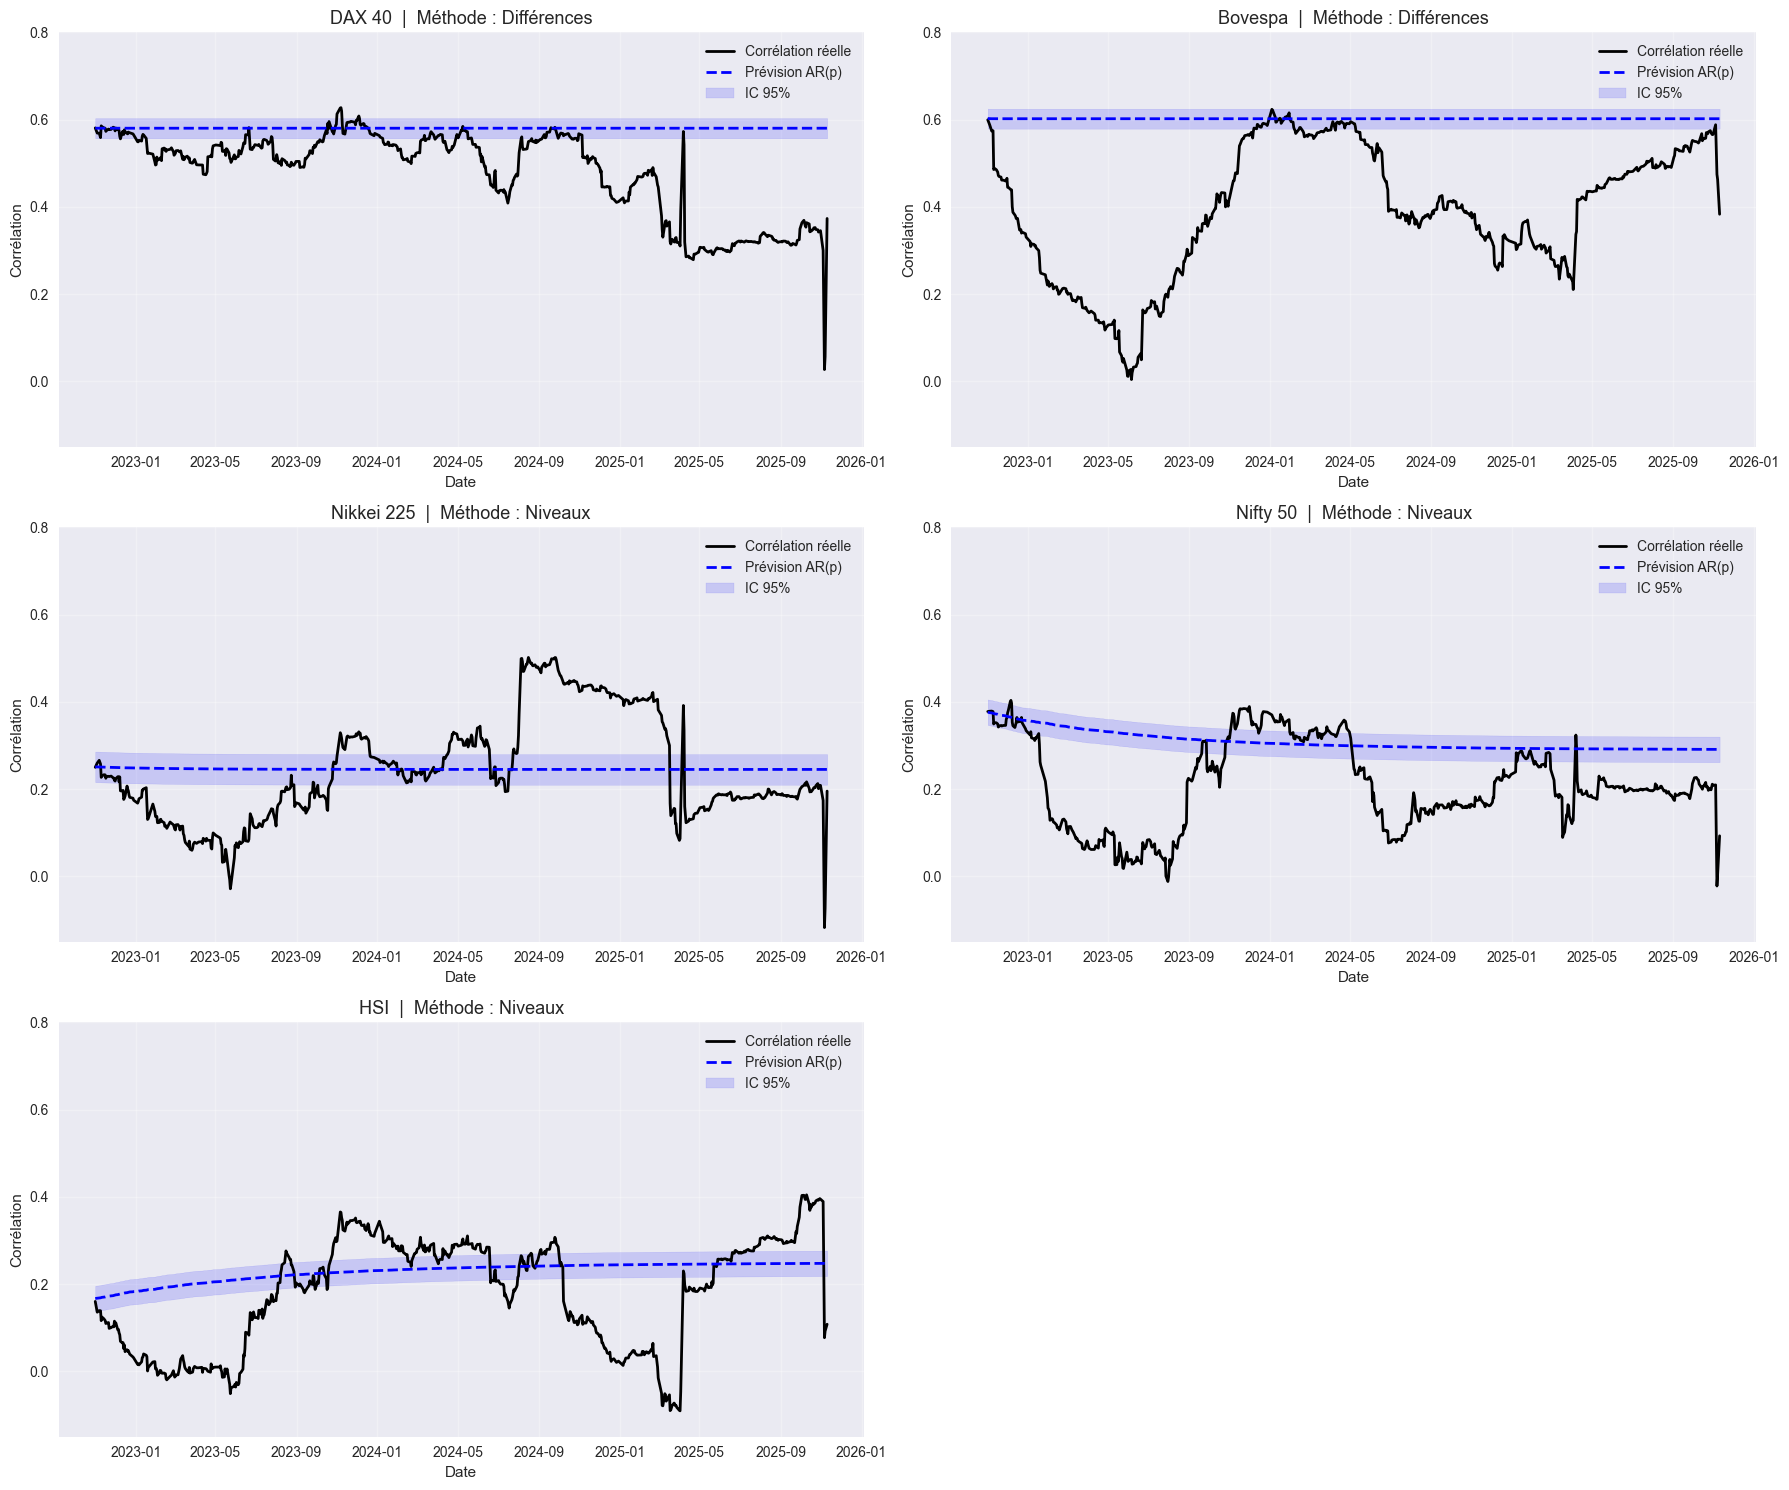

RMSE DAX 40: 0.1413
RMSE Bovespa: 0.2599
RMSE Nikkei 225: 0.1198
RMSE Nifty 50: 0.1444
RMSE HSI: 0.1264


In [11]:
# Section 2.2 – Modélisation AR(p) avec IC 95% (±1.96 × std des résidus, non bornés) pour tous les marchés et 5 graphiques sur une seule image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.stats.diagnostic import acorr_ljungbox
from sklearn.metrics import mean_squared_error

specs = {
    'Corr_DAX 40': 'diff',
    'Corr_Bovespa': 'diff',
    'Corr_Nikkei 225': 'niveau',
    'Corr_Nifty 50': 'niveau',
    'Corr_HSI': 'niveau'
}

results = []
predictions = {}

for col, spec in specs.items():
    y = correlations[col].dropna()
    split = int(len(y) * 0.8)
    train, test = y.iloc[:split], y.iloc[split:]

    # Sélection du p optimal via AIC
    best_aic = np.inf
    best_p = 1
    max_p = min(10, len(train)//10)
    for p in range(1, max_p+1):
        try:
            if spec == 'niveau':
                res = AutoReg(train, lags=p, trend='c', old_names=False).fit()
            else:
                y_diff = train.diff().dropna()
                res = AutoReg(y_diff, lags=p, trend='n', old_names=False).fit()
            if res.aic < best_aic:
                best_aic = res.aic
                best_p = p
        except Exception:
            continue

    # Modélisation finale avec p optimal
    if spec == 'niveau':
        res = AutoReg(train, lags=best_p, trend='c', old_names=False).fit()
        c = res.params[0]
        phi = res.params[1] if best_p == 1 else np.nan
        resid_std = np.std(res.resid)
        preds = []
        prev_vals = list(train.iloc[-best_p:])
        for t in range(len(test)):
            pred = c + sum(res.params[1:] * np.array(prev_vals[::-1]))
            preds.append(pred)
            prev_vals = prev_vals[1:] + [pred]
        preds = np.array(preds)
        ic_upper = preds + 1.96 * resid_std
        ic_lower = preds - 1.96 * resid_std
        rmse = np.sqrt(mean_squared_error(test, preds))
        lb_test = acorr_ljungbox(res.resid, lags=[10, 20], return_df=True)
        results.append({
            'Marché': col.replace('Corr_', ''),
            'Spécification': 'Niveaux',
            'Constante': c,
            'Phi': phi,
            'AIC': best_aic,
            'p_optimal': best_p,
            'RMSE': rmse,
            'LB_pval_10': lb_test['lb_pvalue'].iloc[0],
            'LB_pval_20': lb_test['lb_pvalue'].iloc[1]
        })
        predictions[col] = {'dates': test.index, 'y_true': test.values, 'y_pred': preds, 'ic_upper': ic_upper, 'ic_lower': ic_lower, 'spec': 'Niveaux'}
    else:
        y_diff = train.diff().dropna()
        res = AutoReg(y_diff, lags=best_p, trend='n', old_names=False).fit()
        phi = res.params[0] if best_p == 1 else np.nan
        resid_std = np.std(res.resid)
        last_level = train.iloc[-1]
        preds_level = [last_level]
        prev_diffs = list(y_diff.iloc[-best_p:])
        for t in range(len(test)):
            pred_diff = sum(res.params * np.array(prev_diffs[::-1]))
            pred_level = preds_level[-1] + pred_diff
            preds_level.append(pred_level)
            prev_diffs = prev_diffs[1:] + [pred_diff]
        preds_level = np.array(preds_level[1:])
        ic_upper = preds_level + 1.96 * resid_std
        ic_lower = preds_level - 1.96 * resid_std
        rmse = np.sqrt(mean_squared_error(test, preds_level))
        lb_test = acorr_ljungbox(res.resid, lags=[10, 20], return_df=True)
        results.append({
            'Marché': col.replace('Corr_', ''),
            'Spécification': 'Différences',
            'Phi': phi,
            'AIC': best_aic,
            'p_optimal': best_p,
            'RMSE': rmse,
            'LB_pval_10': lb_test['lb_pvalue'].iloc[0],
            'LB_pval_20': lb_test['lb_pvalue'].iloc[1]
        })
        predictions[col] = {'dates': test.index, 'y_true': test.values, 'y_pred': preds_level, 'ic_upper': ic_upper, 'ic_lower': ic_lower, 'spec': 'Différences'}

# Tableau récapitulatif
results_df = pd.DataFrame(results)
print("\n📋 TABLEAU AR(p) – Spécification, coefficients, AIC, p optimal, RMSE, Ljung–Box")
print(results_df.to_string(index=False, float_format=lambda x: f"{x:.4f}"))

# 5 graphiques sur une seule image
fig, axes = plt.subplots(3, 2, figsize=(18, 15))
axes = axes.flatten()
for i, col in enumerate(specs.keys()):
    pred = predictions[col]
    ax = axes[i]
    ax.plot(pred['dates'], pred['y_true'], label='Corrélation réelle', color='black', linewidth=2)
    ax.plot(pred['dates'], pred['y_pred'], label='Prévision AR(p)', color='blue', linestyle='--', linewidth=2)
    ax.fill_between(pred['dates'], pred['ic_lower'], pred['ic_upper'], color='blue', alpha=0.15, label='IC 95%')
    ax.set_title(f"{col.replace('Corr_', '')}  |  Méthode : {pred['spec']}", fontsize=13)
    ax.set_xlabel('Date')
    ax.set_ylabel('Corrélation')
    ax.legend()
    ax.grid(True, alpha=0.3)
    ax.set_ylim(-0.15, 0.8)  # Limite d'axe y demandée
fig.delaxes(axes[-1])  # Supprime le 6e subplot vide
plt.tight_layout()
plt.show()

# Affichage RMSE pour chaque marché
for col in specs.keys():
    print(f"RMSE {col.replace('Corr_', '')}: {results_df.loc[results_df['Marché'] == col.replace('Corr_', ''), 'RMSE'].values[0]:.4f}")

In [12]:
# 2.3 - Préparation des données explicatives pour chaque marché (fusion VIX + alignement régression)
print("Téléchargement et préparation des données VIX pour la régression explicative...")

# Télécharger les données VIX
vix_data = yf.download('^VIX', start=start_date, end=end_date, progress=False)

# Vérifier que 'correlations' existe, sinon le créer
if 'correlations' not in locals():
    correlations = pd.DataFrame()

if not vix_data.empty:
    # Si correlations est vide, utiliser l'index de vix_data
    if correlations.empty:
        correlations = pd.DataFrame(index=vix_data.index)
    # Aligner les données VIX avec les corrélations
    vix_aligned = vix_data['Close'].reindex(correlations.index, method='ffill')
    
    # Calculer log(VIX) comme spécifié dans l'énoncé
    log_vix = np.log(vix_aligned)
    
    print(f"✓ Données VIX récupérées : {len(vix_aligned)} observations")
    print(f"Période VIX alignée : {vix_aligned.index[0].strftime('%Y-%m-%d')} à {vix_aligned.index[-1].strftime('%Y-%m-%d')}")
    
    # Statistiques descriptives du VIX et log(VIX)
    print(f"\nStatistiques descriptives du VIX :")
    print(f"VIX - Moyenne: {float(vix_aligned.mean()):.2f}, Écart-type: {float(vix_aligned.std()):.2f}")
    print(f"VIX - Min: {float(vix_aligned.min()):.2f}, Max: {float(vix_aligned.max()):.2f}")
    
    print(f"\nStatistiques descriptives de log(VIX) :")
    print(f"log(VIX) - Moyenne: {float(log_vix.mean()):.4f}, Écart-type: {float(log_vix.std()):.4f}")
    print(f"log(VIX) - Min: {float(log_vix.min()):.4f}, Max: {float(log_vix.max()):.4f}")
    
    # Sauvegarder pour les étapes suivantes
    correlations['VIX'] = vix_aligned
    correlations['log_VIX'] = log_vix
    
    print(f"\n✓ Variables ajoutées au DataFrame des corrélations")
    print(f"Shape final du DataFrame : {correlations.shape}")
    
    # Vérifier la cohérence des données
    print(f"\nVérification des données finales :")
    print(f"Valeurs manquantes :")
    print(correlations[['VIX', 'log_VIX']].isnull().sum())

    # Préparation des données pour la régression explicative (Corr vs log(VIX))
    print("\nPréparation des données pour la régression explicative (Corr vs log(VIX))...")
    markets = [col for col in correlations.columns if col.startswith('Corr_')]
    regression_data = {}
    if 'log_VIX' in correlations.columns:
        for market in markets:
            # Extraire la série de corrélation et log(VIX), aligner et retirer les valeurs nulles
            df = pd.DataFrame({
                'Corr': correlations[market],
                'log_VIX': correlations['log_VIX']
            }).dropna()
            regression_data[market] = df
            print(f"{market}: {len(df)} observations alignées, période {df.index[0].strftime('%Y-%m-%d')} à {df.index[-1].strftime('%Y-%m-%d')}")

        # Vérification rapide
        for market, df in regression_data.items():
            print(f"\n{market} - Aperçu des données alignées :")
            print(df.head())
    else:
        print("✗ La colonne 'log_VIX' est absente du DataFrame correlations. Impossible de préparer les données explicatives pour la régression.")
else:
    print("✗ Erreur lors du téléchargement des données VIX")

Téléchargement et préparation des données VIX pour la régression explicative...
✓ Données VIX récupérées : 3137 observations
Période VIX alignée : 2010-08-09 à 2025-11-10

Statistiques descriptives du VIX :
VIX - Moyenne: 18.17, Écart-type: 6.86
VIX - Min: 9.22, Max: 82.69

Statistiques descriptives de log(VIX) :
log(VIX) - Moyenne: 2.8457, Écart-type: 0.3143
log(VIX) - Min: 2.2214, Max: 4.4151

✓ Variables ajoutées au DataFrame des corrélations
Shape final du DataFrame : (3137, 7)

Vérification des données finales :
Valeurs manquantes :
VIX        0
log_VIX    0
dtype: int64

Préparation des données pour la régression explicative (Corr vs log(VIX))...
Corr_DAX 40: 3137 observations alignées, période 2010-08-09 à 2025-11-10
Corr_Nikkei 225: 3137 observations alignées, période 2010-08-09 à 2025-11-10
Corr_Bovespa: 3137 observations alignées, période 2010-08-09 à 2025-11-10
Corr_Nifty 50: 3137 observations alignées, période 2010-08-09 à 2025-11-10
Corr_HSI: 3137 observations alignées, pé